In [55]:
from matplotlib import pyplot as plt
import seaborn as sns
import math
import scipy
import numpy as np
import scipy.stats as st

# Узнаем номера моих задач

In [82]:
from zlib import crc32
import numpy as np

mail = input('\n')
to_hash =  mail.strip().split('@')[0]    
h = crc32(to_hash.encode('utf-8'))
seed = h%(2**32-1)
rs = np.random.RandomState(seed)
task1 = rs.randint(low=1, high=5)
task2 = rs.randint(low=1, high=5)
task3 = rs.randint(low=1, high=5)
task4 = rs.randint(low=1, high=4)
print ('Your tasks are 1.{}, 2.{}, 3.{}, 4.{}'.format(task1, task2, task3, task4))


ugnivenko.va@phystech.edu
Your tasks are 1.1, 2.2, 3.2, 4.3


# Задача 1.1 

Проверить мощность и консервативность критериев Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределений:

- Нормальное
- Лапласа
- Стьюдента
- Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)

## Посмотрим на вид данных, с которыми мы будем работать

### Выборка из старндартного нормального распределения 

In [8]:
normal_sample = np.random.normal(size = 1000, loc = 0, scale = 1)

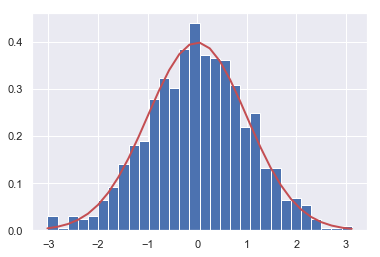

In [26]:
mu = 0
sigma = 1

count, bins, ignored = plt.hist(normal_sample, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

### Выборка из распределения Лапласа

In [15]:
laplace_sample = np.random.laplace(loc = 0 , scale = 1, size = 1000)

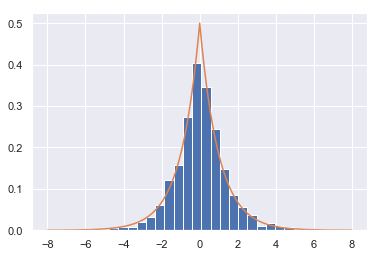

In [18]:
loc = 0 
scale = 1

plt.hist(laplace_sample, 30, density=True)
x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
plt.plot(x, pdf)

### Выборка из распределения Стьюдента 

In [35]:
student_sample = np.random.standard_t(10, size=1000)

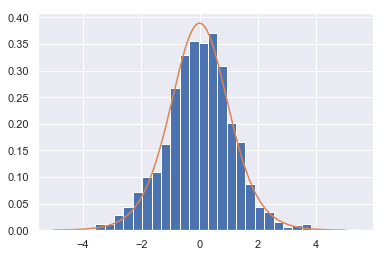

In [42]:
k = 10 

plt.hist(student_sample, bins=30, density=True)
x = np.arange(-5., 5., .01)
plt.plot(x, 1/(math.sqrt(k)*scipy.special.beta(1/2, k/2))*(1+x**2/k)**(-(k+1)/2))
plt.show()

### Выборка из усеченного нормального распределения 

In [46]:
normal_sample = np.random.normal(size = 1000, loc = 0, scale = 1)
truncated_normal_sample = [x for x in normal_sample.tolist() if np.abs(x)<=2]

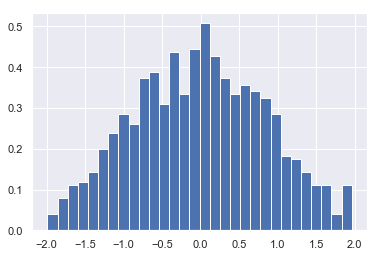

In [53]:
mu = 0
sigma = 1

count, bins, ignored = plt.hist(truncated_normal_sample, 30, density=True)
plt.show()

## Теперь проверим мощность и консервативность критериев 

Посчитаем значения эмпирической мощности для выборок разной мощности и разных параметров, чтобы исключить влияние этих параметров на мощность.

In [88]:
alpha = 0.05
number_of_exp = 1000

### Критерий Лиллиефорса

In [84]:
from statsmodels.stats.diagnostic import lilliefors

#### Распределение Лапсласа

In [160]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 1000, 2000]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические мощности имеют значения:')
    for _ in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.laplace.rvs(loc = loc , scale = scale, size = size_of_sample)
            if lilliefors(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

При размере выборки = 10 эмпирические мощности имеют значения:
0.154 0.139 0.144 0.138 0.139 0.136 0.139 0.144 0.127 0.152 
При размере выборки = 50 эмпирические мощности имеют значения:
0.421 0.465 0.423 0.41 0.445 0.447 0.431 0.464 0.435 0.436 
При размере выборки = 100 эмпирические мощности имеют значения:
0.724 0.704 0.717 0.728 0.711 0.727 0.707 0.716 0.68 0.691 
При размере выборки = 250 эмпирические мощности имеют значения:
0.978 0.985 0.979 0.976 0.979 0.982 0.98 0.979 0.985 0.978 
При размере выборки = 500 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 0.999 1.0 1.0 1.0 1.0 1.0 
При размере выборки = 1000 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
При размере выборки = 2000 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


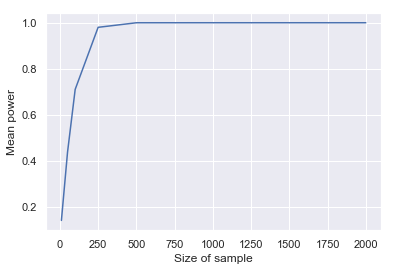

In [161]:
plt.plot([10, 50, 100, 250, 500, 1000, 2000],pows)
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

#### Распределение Стьюдента

In [151]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 700, 800]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические мощности имеют значения:')
    for _ in range(10):
        k = np.random.randint(5, 10)
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.t.rvs(size = size_of_sample, df = k)
            if lilliefors(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

При размере выборки = 10 эмпирические мощности имеют значения:
0.074 0.065 0.075 0.07 0.079 0.08 0.061 0.066 0.068 0.077 
При размере выборки = 50 эмпирические мощности имеют значения:
0.099 0.092 0.099 0.155 0.098 0.093 0.159 0.115 0.111 0.177 
При размере выборки = 100 эмпирические мощности имеют значения:
0.118 0.312 0.367 0.13 0.142 0.313 0.198 0.245 0.335 0.356 
При размере выборки = 250 эмпирические мощности имеют значения:
0.205 0.625 0.203 0.451 0.624 0.198 0.441 0.241 0.34 0.451 
При размере выборки = 500 эмпирические мощности имеют значения:
0.909 0.334 0.347 0.57 0.901 0.413 0.473 0.752 0.324 0.438 
При размере выборки = 700 эмпирические мощности имеют значения:
0.435 0.97 0.472 0.591 0.457 0.448 0.582 0.974 0.478 0.454 
При размере выборки = 800 эмпирические мощности имеют значения:
0.503 0.783 0.985 0.801 0.516 0.897 0.918 0.781 0.616 0.634 


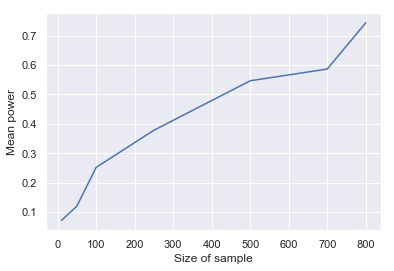

In [152]:
plt.plot([10, 50, 100, 250, 500, 700, 800],pows)
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

#### Усеченное нормальное распределение

In [153]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 700, 800, 900]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические мощности имеют значения:')
    for _ in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.truncnorm.rvs(loc = loc , scale = scale, size = size_of_sample, a = -2, b = 2)
            if lilliefors(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

При размере выборки = 10 эмпирические мощности имеют значения:
0.037 0.043 0.044 0.039 0.04 0.036 0.042 0.032 0.036 0.034 
При размере выборки = 50 эмпирические мощности имеют значения:
0.047 0.047 0.043 0.044 0.041 0.053 0.05 0.048 0.047 0.047 
При размере выборки = 100 эмпирические мощности имеют значения:
0.059 0.07 0.068 0.064 0.053 0.065 0.061 0.062 0.073 0.056 
При размере выборки = 250 эмпирические мощности имеют значения:
0.116 0.104 0.108 0.114 0.105 0.1 0.11 0.102 0.105 0.135 
При размере выборки = 500 эмпирические мощности имеют значения:
0.207 0.227 0.198 0.23 0.196 0.217 0.209 0.218 0.237 0.21 
При размере выборки = 700 эмпирические мощности имеют значения:
0.342 0.328 0.324 0.298 0.314 0.326 0.322 0.306 0.326 0.305 
При размере выборки = 800 эмпирические мощности имеют значения:
0.375 0.379 0.397 0.38 0.391 0.408 0.388 0.367 0.364 0.378 
При размере выборки = 900 эмпирические мощности имеют значения:
0.469 0.431 0.438 0.409 0.438 0.443 0.425 0.452 0.439 0.44 


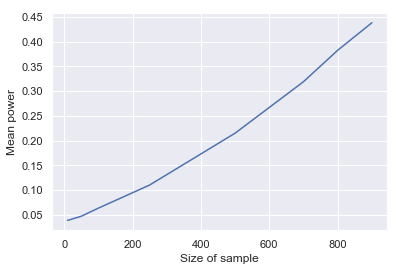

In [156]:
plt.plot([10, 50, 100, 250, 500, 700, 800, 900],pows)
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

#### Нормальное распределение

In [172]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 700, 800, 900]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические ошибки первого рода имеют значения:')
    for _ in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.norm.rvs(loc = loc , scale = scale, size = size_of_sample)
            if lilliefors(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

При размере выборки = 10 эмпирические ошибки первого рода имеют значения:
0.044 0.054 0.056 0.039 0.042 0.051 0.035 0.041 0.043 0.05 
При размере выборки = 50 эмпирические ошибки первого рода имеют значения:
0.045 0.036 0.046 0.055 0.062 0.045 0.047 0.046 0.052 0.051 
При размере выборки = 100 эмпирические ошибки первого рода имеют значения:
0.052 0.065 0.061 0.044 0.056 0.057 0.049 0.044 0.041 0.055 
При размере выборки = 250 эмпирические ошибки первого рода имеют значения:
0.044 0.046 0.051 0.05 0.053 0.05 0.053 0.053 0.045 0.041 
При размере выборки = 500 эмпирические ошибки первого рода имеют значения:
0.054 0.047 0.039 0.045 0.04 0.05 0.047 0.052 0.049 0.048 
При размере выборки = 700 эмпирические ошибки первого рода имеют значения:
0.049 0.055 0.058 0.059 0.036 0.057 0.052 0.038 0.037 0.046 
При размере выборки = 800 эмпирические ошибки первого рода имеют значения:
0.041 0.05 0.052 0.048 0.051 0.047 0.042 0.044 0.047 0.056 
При размере выборки = 900 эмпирические ошибки первого ро

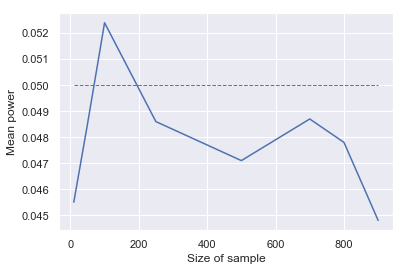

In [173]:
plt.plot([10, 50, 100, 250, 500, 700, 800, 900],pows)
plt.hlines(0.05, 10, 900, color = 'r',
          linewidth = 1,
          linestyle = '--')
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

Вывод: В общем и целом мощность стремится к единице, при увеличении размера выборки. Из последнего графика видно, что критерий  консервативен, так как доля отклоненных гипотез при условии истинности нулевой гипотезы ниже, чем уровень значимости. Также можно заключить, что этот метод чувствителен к выборкам с хвостами, отличающимися от ожидаемых - распределение Стьюдента и усечённое нормальное распределение.

### Критерий Харке-Бера 

In [128]:
from statsmodels.stats.stattools import jarque_bera

#### Распределение Лапласса

In [184]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 1000, 2000]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические мощности имеют значения:')
    for _ in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.laplace.rvs(loc = loc , scale = scale, size = size_of_sample)
            if jarque_bera(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

При размере выборки = 10 эмпирические мощности имеют значения:
0.065 0.057 0.064 0.074 0.052 0.072 0.065 0.062 0.062 0.075 
При размере выборки = 50 эмпирические мощности имеют значения:
0.536 0.522 0.5 0.507 0.518 0.483 0.489 0.544 0.547 0.532 
При размере выборки = 100 эмпирические мощности имеют значения:
0.785 0.758 0.771 0.77 0.746 0.776 0.792 0.804 0.784 0.796 
При размере выборки = 250 эмпирические мощности имеют значения:
0.984 0.98 0.99 0.991 0.987 0.983 0.977 0.986 0.982 0.979 
При размере выборки = 500 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
При размере выборки = 1000 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
При размере выборки = 2000 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


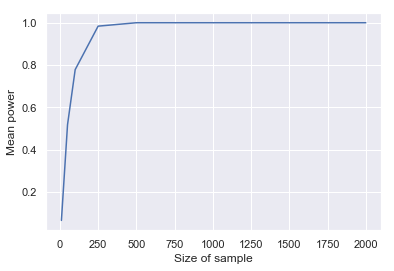

In [185]:
plt.plot([10, 50, 100, 250, 500, 1000, 2000],pows)
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

#### Распределение Стьюдента

In [186]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 1000, 2000]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические мощности имеют значения:')
    for _ in range(10):
        k = np.random.randint(5, 10)
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.t.rvs(size = size_of_sample, df = k)
            if jarque_bera(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

При размере выборки = 10 эмпирические мощности имеют значения:
0.028 0.017 0.022 0.034 0.024 0.045 0.027 0.02 0.052 0.031 
При размере выборки = 50 эмпирические мощности имеют значения:
0.205 0.308 0.256 0.382 0.405 0.216 0.299 0.219 0.408 0.188 
При размере выборки = 100 эмпирические мощности имеют значения:
0.443 0.638 0.53 0.359 0.316 0.362 0.367 0.34 0.377 0.359 
При размере выборки = 250 эмпирические мощности имеют значения:
0.753 0.593 0.597 0.662 0.574 0.911 0.93 0.594 0.831 0.675 
При размере выборки = 500 эмпирические мощности имеют значения:
0.893 0.996 0.962 0.931 0.924 0.934 0.971 0.892 0.929 0.815 
При размере выборки = 1000 эмпирические мощности имеют значения:
1.0 1.0 0.975 0.98 1.0 1.0 0.999 1.0 1.0 0.991 
При размере выборки = 2000 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 0.999 1.0 1.0 1.0 1.0 


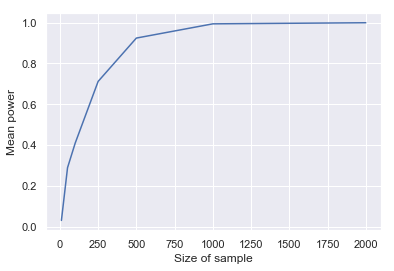

In [187]:
plt.plot([10, 50, 100, 250, 500, 1000, 2000],pows)
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

#### Усеченное нормальное распределение

In [134]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 1000, 2000]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические мощности имеют значения:')
    for _ in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.truncnorm.rvs(loc = loc , scale = scale, size = size_of_sample, a = -2, b = 2)
            if jarque_bera(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

Усеченное нормальное распределение

При размере выборки = 10 эмпирические мощности имеют значения:
0.005 0.003 0.005 0.003 0.004 0.005 0.002 0.004 0.005 0.004 
При размере выборки = 50 эмпирические мощности имеют значения:
0.0 0.001 0.001 0.0 0.0 0.0 0.001 0.0 0.0 0.0 
При размере выборки = 100 эмпирические мощности имеют значения:
0.001 0.001 0.001 0.002 0.0 0.0 0.001 0.0 0.001 0.0 
При размере выборки = 250 эмпирические мощности имеют значения:
0.229 0.228 0.201 0.223 0.215 0.207 0.222 0.209 0.215 0.208 
При размере выборки = 500 эмпирические мощности имеют значения:
0.914 0.899 0.892 0.886 0.881 0.885 0.897 0.895 0.895 0.906 
При размере выборки = 1000 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
При размере выборки = 2000 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


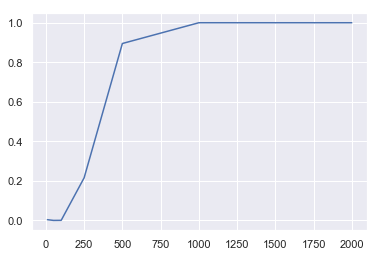

In [136]:
plt.plot([10, 50, 100, 250, 500, 1000, 2000],pows)
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

#### Нормальное распределение

In [174]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 1000, 2000]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические ошибки первого рода имеют значения:')
    for _ in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.norm.rvs(loc = loc , scale = scale, size = size_of_sample)
            if jarque_bera(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

При размере выборки = 10 эмпирические ошибки первого рода имеют значения:
0.009 0.013 0.004 0.006 0.008 0.011 0.011 0.006 0.006 0.008 
При размере выборки = 50 эмпирические ошибки первого рода имеют значения:
0.037 0.031 0.034 0.038 0.032 0.028 0.041 0.043 0.049 0.031 
При размере выборки = 100 эмпирические ошибки первого рода имеют значения:
0.041 0.041 0.047 0.031 0.031 0.049 0.039 0.041 0.037 0.034 
При размере выборки = 250 эмпирические ошибки первого рода имеют значения:
0.039 0.049 0.045 0.051 0.042 0.049 0.044 0.053 0.056 0.031 
При размере выборки = 500 эмпирические ошибки первого рода имеют значения:
0.044 0.043 0.044 0.048 0.048 0.05 0.039 0.054 0.052 0.042 
При размере выборки = 1000 эмпирические ошибки первого рода имеют значения:
0.051 0.052 0.043 0.049 0.049 0.042 0.054 0.041 0.044 0.054 
При размере выборки = 2000 эмпирические ошибки первого рода имеют значения:
0.054 0.048 0.055 0.048 0.051 0.044 0.052 0.06 0.05 0.06 


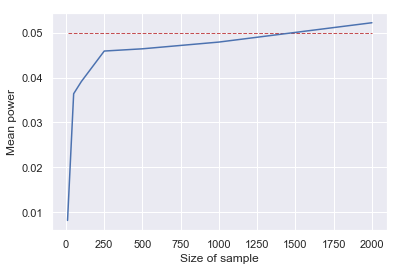

In [175]:
plt.plot([10, 50, 100, 250, 500, 1000, 2000],pows)
plt.hlines(0.05, 10, 2000, color = 'r',
          linewidth = 1,
          linestyle = '--')
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

Вывод:  В общем и целом мощность стремится к единице, при увеличении размера выборки. Из последнего графика видно, что критерий  консервативен, так как доля отклоненных гипотез при условии истинности нулевой гипотезы ниже, чем уровень значимости. Также можно заключить, что этот метод более чувствителен (чем предыдущий) к выборкам с хвостами, отличающимися от ожидаемых - распределение Стьюдента и усечённое нормальное распределение.

### Критерий Шапиро-Улика 

#### Распределение Лапласа 

In [141]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 1000, 2000]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические мощности имеют значения:')
    for _ in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.laplace.rvs(loc = loc , scale = scale, size = size_of_sample)
            if st.shapiro(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

При размере выборки = 10 эмпирические мощности имеют значения:
0.132 0.129 0.147 0.153 0.152 0.151 0.149 0.149 0.164 0.145 
При размере выборки = 50 эмпирические мощности имеют значения:
0.528 0.523 0.493 0.521 0.497 0.508 0.488 0.546 0.497 0.501 
При размере выборки = 100 эмпирические мощности имеют значения:
0.797 0.817 0.787 0.771 0.792 0.802 0.775 0.79 0.78 0.796 
При размере выборки = 250 эмпирические мощности имеют значения:
0.987 0.989 0.994 0.991 0.994 0.989 0.995 0.99 0.99 0.991 
При размере выборки = 500 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
При размере выборки = 1000 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
При размере выборки = 2000 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


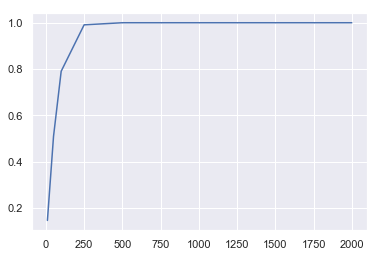

In [142]:
plt.plot([10, 50, 100, 250, 500, 1000, 2000],pows)
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

#### Распределение Стьюдента  

In [144]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 1000, 2000]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические мощности имеют значения:')
    for _ in range(10):
        k = np.random.randint(5, 10)
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.t.rvs(size = size_of_sample, df = k)
            if st.shapiro(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

При размере выборки = 10 эмпирические мощности имеют значения:
0.09 0.101 0.076 0.074 0.09 0.119 0.093 0.09 0.076 0.085 
При размере выборки = 50 эмпирические мощности имеют значения:
0.302 0.163 0.247 0.269 0.378 0.222 0.228 0.248 0.212 0.36 
При размере выборки = 100 эмпирические мощности имеют значения:
0.456 0.446 0.561 0.349 0.319 0.302 0.371 0.314 0.463 0.383 
При размере выборки = 250 эмпирические мощности имеют значения:
0.887 0.78 0.881 0.466 0.495 0.492 0.507 0.507 0.902 0.891 
При размере выборки = 500 эмпирические мощности имеют значения:
0.955 0.826 0.816 0.834 0.747 0.728 0.955 0.963 0.99 0.989 
При размере выборки = 1000 эмпирические мощности имеют значения:
0.996 0.944 1.0 1.0 0.968 0.944 1.0 0.973 0.998 1.0 
При размере выборки = 2000 эмпирические мощности имеют значения:
0.999 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.998 1.0 


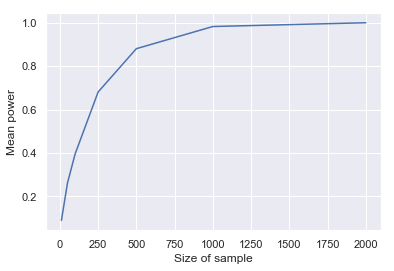

In [145]:
plt.plot([10, 50, 100, 250, 500, 1000, 2000],pows)
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

#### Усечённое нормальное распределение

In [146]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 1000, 2000]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические мощности имеют значения:')
    for _ in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.truncnorm.rvs(loc = loc , scale = scale, size = size_of_sample, a = -2, b = 2)
            if st.shapiro(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

При размере выборки = 10 эмпирические мощности имеют значения:
0.032 0.035 0.037 0.043 0.034 0.046 0.043 0.033 0.035 0.037 
При размере выборки = 50 эмпирические мощности имеют значения:
0.049 0.033 0.052 0.056 0.047 0.047 0.053 0.056 0.06 0.058 
При размере выборки = 100 эмпирические мощности имеют значения:
0.139 0.149 0.138 0.135 0.122 0.127 0.132 0.103 0.123 0.125 
При размере выборки = 250 эмпирические мощности имеют значения:
0.634 0.639 0.632 0.628 0.636 0.623 0.64 0.643 0.649 0.658 
При размере выборки = 500 эмпирические мощности имеют значения:
0.994 0.997 0.993 0.993 0.995 0.993 0.997 0.996 0.997 0.997 
При размере выборки = 1000 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
При размере выборки = 2000 эмпирические мощности имеют значения:
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


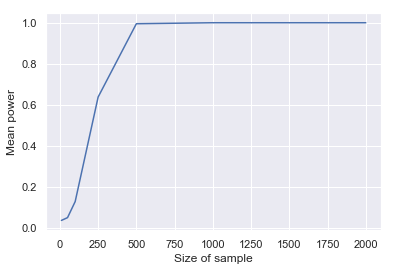

In [147]:
plt.plot([10, 50, 100, 250, 500, 1000, 2000],pows)
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

#### Нормальное распределение

In [176]:
pows = []
for size_of_sample in [10, 50, 100, 250, 500, 1000, 2000]:
    particular_pows = []
    print(f'При размере выборки = {size_of_sample} эмпирические ошибки первого рода имеют значения:')
    for _ in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        
        rejected = 0
        for i in range(number_of_exp):
            sample = st.norm.rvs(loc = loc , scale = scale, size = size_of_sample)
            if st.shapiro(sample)[1] <= alpha:
                rejected += 1
        print(rejected / number_of_exp, end=' ')
        particular_pows.append(rejected / number_of_exp)
    pows.append(np.mean(particular_pows))
    print()

При размере выборки = 10 эмпирические ошибки первого рода имеют значения:
0.053 0.055 0.053 0.068 0.055 0.045 0.06 0.048 0.056 0.053 
При размере выборки = 50 эмпирические ошибки первого рода имеют значения:
0.067 0.045 0.045 0.056 0.045 0.039 0.053 0.047 0.051 0.041 
При размере выборки = 100 эмпирические ошибки первого рода имеют значения:
0.032 0.042 0.05 0.04 0.054 0.05 0.049 0.064 0.043 0.05 
При размере выборки = 250 эмпирические ошибки первого рода имеют значения:
0.053 0.042 0.052 0.043 0.06 0.052 0.054 0.036 0.051 0.048 
При размере выборки = 500 эмпирические ошибки первого рода имеют значения:
0.053 0.049 0.05 0.057 0.051 0.052 0.047 0.035 0.051 0.042 
При размере выборки = 1000 эмпирические ошибки первого рода имеют значения:
0.053 0.057 0.041 0.049 0.056 0.054 0.055 0.062 0.052 0.051 
При размере выборки = 2000 эмпирические ошибки первого рода имеют значения:
0.044 0.058 0.059 0.062 0.043 0.058 0.044 0.045 0.047 0.04 


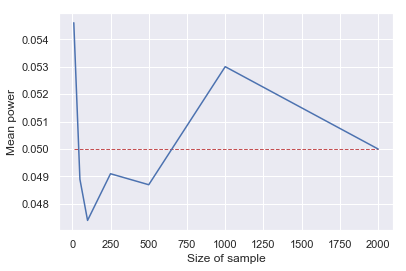

In [177]:
plt.plot([10, 50, 100, 250, 500, 1000, 2000],pows)
plt.hlines(0.05, 10, 2000, color = 'r',
          linewidth = 1,
          linestyle = '--')
plt.xlabel('Size of sample')
plt.ylabel('Mean power')
plt.show()

Вывод : В общем и целом мощность стремится к единице, при увеличении размера выборки.Из последнего графика видно, что консервативнм не является. Также можно заключить, что этот метод чувствителен к выборкам (примерно также, как и предыдущий) с хвостами, отличающимися от ожидаемых - распределение Стьюдента и усечённое нормальное распределение.